In [166]:
import os
import random
import pickle
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [167]:
# image_folder = '/Users/costanzasiniscalchi/Documents/MS/DLCV/Sheet-Music-Parser/ModelTrainer/datasets/data/data/muscima_pp_raw/v2.0/data/images'
# annotation_folder = '/Users/costanzasiniscalchi/Documents/MS/DLCV/Sheet-Music-Parser/ModelTrainer/datasets/data/data/muscima_pp_raw/v2.0/data/annotations'
# bbox_file = '/Users/costanzasiniscalchi/Documents/MS/DLCV/Sheet-Music-Parser/ModelTrainer/datasets/data/data/muscima_pp_raw/v2.0/data/bounding_boxes.pkl'

In [168]:

test_xml_directory = "./datasets/data/data/muscima_split/" + 'test' + '/annotations'  # Path to directory with XML files
test_img_directory = "./datasets/data/data/muscima_split/" + 'test' + '/sheet_music'
test_box_directory = './datasets/data/data/muscima_split/' + 'test' + 'bounding_boxes'
test_output_path = "./dasets/data/data/muscima_split/" + 'test' + "/bounding_boxes.pkl"

train_xml_directory = "./datasets/data/data/muscima_split/" + 'train' + '/annotations'  # Path to directory with XML files
train_img_directory = "./datasets/data/data/muscima_split/" + 'train' + '/sheet_music'
train_box_directory = './datasets/data/data/muscima_split/' + 'train' + 'bounding_boxes'
train_output_path = "./dasets/data/data/muscima_split/" + 'train' + "/bounding_boxes.pkl"

val_xml_directory = "./datasets/data/data/muscima_split/" + 'val' + '/annotations'  # Path to directory with XML files
val_img_directory = "./datasets/data/data/muscima_split/" + 'val' + '/sheet_music'
val_box_directory = './datasets/data/data/muscima_split/' + 'val' + 'bounding_boxes'
val_output_path = "./dasets/data/data/muscima_split/" + 'val' + "/bounding_boxes.pkl"

In [169]:
# Function to load bounding boxes from pkl file
def load_bounding_boxes(pkl_path):
    print("Loading file:", pkl_path)
    try:
        with open(pkl_path, 'rb') as file:
            bbox_dict = pickle.load(file)
        # print("dict example: ", bbox_dict['CVC-MUSCIMA_W-28_N-05_D-ideal.jpg'])
        return bbox_dict
    except Exception as e:
        print(f"Error: {e}")

# Function to convert bounding box format
def get_box_coordinates(box_info):
    """Convert origin/width/height to (x_min, y_min, x_max, y_max)."""
    x_min = box_info["origin"]["x"]
    y_min = box_info["origin"]["y"]
    x_max = x_min + box_info["width"]
    y_max = y_min + box_info["height"]
    return [x_min, y_min, x_max, y_max]

# Function to draw bounding boxes on an image
def draw_bounding_boxes(image, boxes, color="red", width=3):
    draw = ImageDraw.Draw(image)
    for box_info in boxes:
        try:
            box_coords = get_box_coordinates(box_info)
            # print(f"Drawing box: {box_coords}")  # Debugging: Print coordinates
            draw.rectangle(box_coords, outline=color, width=width)
        except KeyError as e:
            print(f"Error in bounding box format: {e}")

In [170]:
imgs = [test_img_directory, val_img_directory, train_img_directory]
annots = [test_xml_directory, val_xml_directory, train_xml_directory]
for image_folder, annotation_folder in zip(imgs, annots):
    print(image_folder, annotation_folder)
    # checking data integrity
    # List all image files in the directory (supports .jpg and .png)
    all_images = [os.path.splitext(f)[0] for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))]
    all_annots = [f for f in os.listdir(annotation_folder) if f.endswith('.xml')]
    print(len(all_images), len(all_annots))
    for im in all_images:
        if str(im+'.xml') not in all_annots:
            print(im)

./datasets/data/data/muscima_split/test/sheet_music ./datasets/data/data/muscima_split/test/annotations
14 14
./datasets/data/data/muscima_split/val/sheet_music ./datasets/data/data/muscima_split/val/annotations
13 13
./datasets/data/data/muscima_split/train/sheet_music ./datasets/data/data/muscima_split/train/annotations
113 113


In [171]:
# List all image files in the directory (supports .jpg and .png)
all_images = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))]
bounding_boxes_ims = list(load_bounding_boxes(bbox_file).keys())
print(len(all_images), len(bounding_boxes_ims))
for im in all_images:
    if im not in bounding_boxes_ims:
        print(im)

Loading file: /Users/costanzasiniscalchi/Documents/MS/DLCV/Sheet-Music-Parser/ModelTrainer/datasets/data/data/muscima_pp_raw/v2.0/data/bounding_boxes.pkl
113 140


Loading file: /Users/costanzasiniscalchi/Documents/MS/DLCV/Sheet-Music-Parser/ModelTrainer/datasets/data/data/muscima_pp_raw/v2.0/data/bounding_boxes.pkl
selected images:  ['CVC-MUSCIMA_W-31_N-18_D-ideal.png', 'CVC-MUSCIMA_W-42_N-08_D-ideal.png', 'CVC-MUSCIMA_W-01_N-19_D-ideal.png', 'CVC-MUSCIMA_W-02_N-13_D-ideal.png']
Processing image: CVC-MUSCIMA_W-31_N-18_D-ideal.png
Found 802 bounding box(es) for CVC-MUSCIMA_W-31_N-18_D-ideal.png


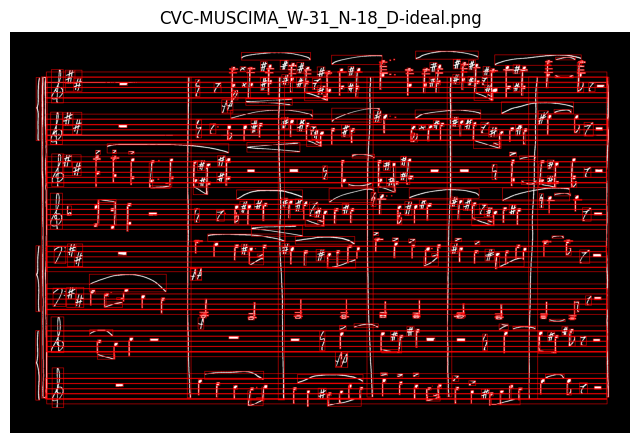

Processing image: CVC-MUSCIMA_W-42_N-08_D-ideal.png
Found 775 bounding box(es) for CVC-MUSCIMA_W-42_N-08_D-ideal.png


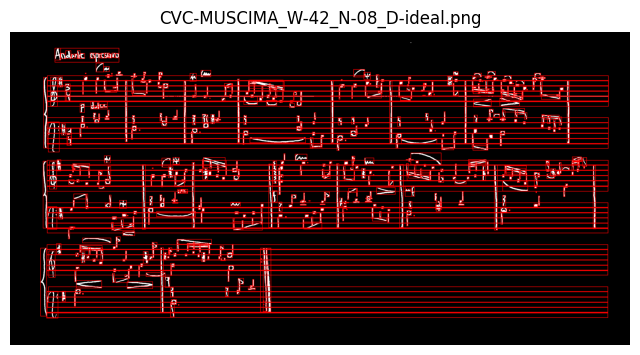

Processing image: CVC-MUSCIMA_W-01_N-19_D-ideal.png
Found 582 bounding box(es) for CVC-MUSCIMA_W-01_N-19_D-ideal.png


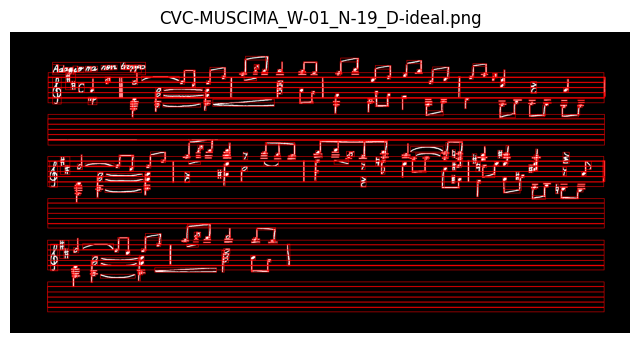

Processing image: CVC-MUSCIMA_W-02_N-13_D-ideal.png
Found 679 bounding box(es) for CVC-MUSCIMA_W-02_N-13_D-ideal.png


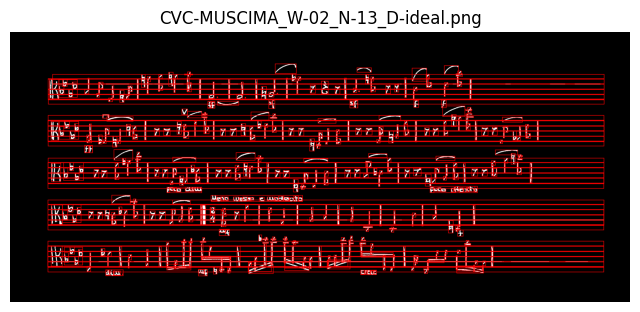

In [172]:
# Load bounding boxes
bounding_boxes = load_bounding_boxes(bbox_file)

# List all image files in the directory (supports .jpg and .png)
all_images = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))]


# Randomly select up to 4 images
selected_images = random.sample(all_images, 4)
print("selected images: ", selected_images)

# Display each image individually
for img_name in selected_images:
    print(f"Processing image: {img_name}")  # Debugging: Print image name
    img_path = os.path.join(image_folder, img_name)
    img = Image.open(img_path).convert("RGB")
    
    
    # Get bounding boxes for the image (default to empty list if not found)
    boxes = bounding_boxes[img_name]
    
    # if isinstance(boxes, dict):  # Single box case
    #     boxes = [boxes]
    
    print(f"Found {len(boxes)} bounding box(es) for {img_name}")  # Debugging: Print number of boxes
    
    # Draw bounding boxes
    draw_bounding_boxes(img, boxes, color="red")
    
    # Display the image with bounding boxes
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title(img_name)
    plt.axis('off')
    plt.show()


Loading file: /Users/costanzasiniscalchi/Documents/MS/DLCV/Sheet-Music-Parser/ModelTrainer/datasets/data/data/muscima_pp_raw/v2.0/data/bounding_boxes.pkl
selected images:  ['CVC-MUSCIMA_W-31_N-01_D-ideal.png', 'CVC-MUSCIMA_W-05_N-19_D-ideal.png', 'CVC-MUSCIMA_W-43_N-15_D-ideal.png', 'CVC-MUSCIMA_W-11_N-09_D-ideal.png']
Processing image: CVC-MUSCIMA_W-31_N-01_D-ideal.png
Found 854 bounding box(es) for CVC-MUSCIMA_W-31_N-01_D-ideal.png


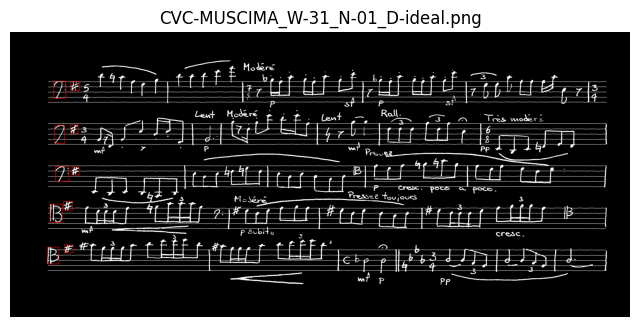

Processing image: CVC-MUSCIMA_W-05_N-19_D-ideal.png
Found 609 bounding box(es) for CVC-MUSCIMA_W-05_N-19_D-ideal.png


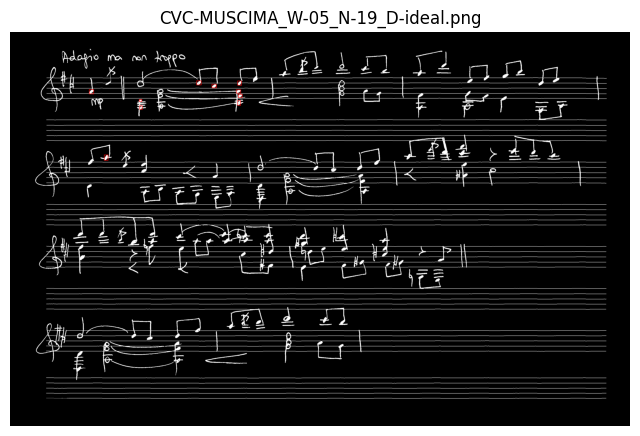

Processing image: CVC-MUSCIMA_W-43_N-15_D-ideal.png
Found 676 bounding box(es) for CVC-MUSCIMA_W-43_N-15_D-ideal.png


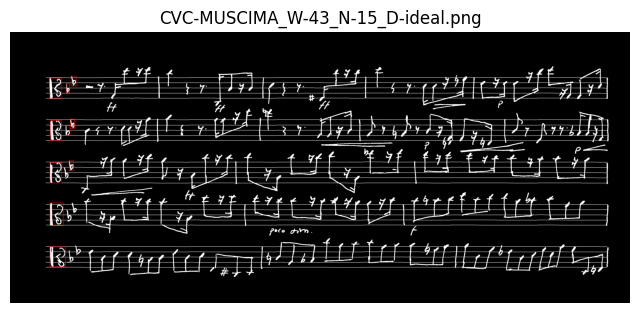

Processing image: CVC-MUSCIMA_W-11_N-09_D-ideal.png
Found 535 bounding box(es) for CVC-MUSCIMA_W-11_N-09_D-ideal.png


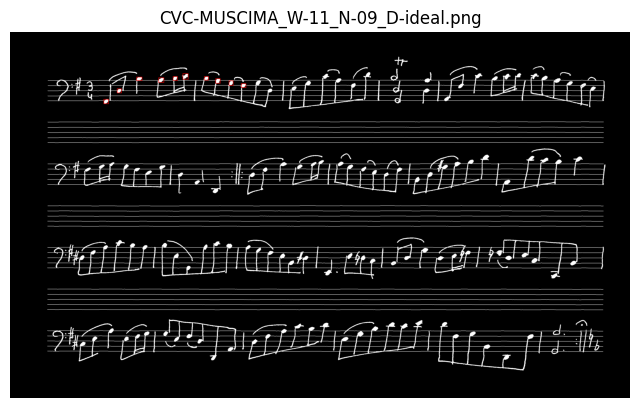

In [173]:
# Load bounding boxes
bounding_boxes = load_bounding_boxes(bbox_file)

# List all image files in the directory (supports .jpg and .png)
all_images = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))]


# Randomly select up to 4 images
selected_images = random.sample(all_images, 4)
print("selected images: ", selected_images)

# Display each image individually
for img_name in selected_images:
    print(f"Processing image: {img_name}")  # Debugging: Print image name
    img_path = os.path.join(image_folder, img_name)
    img = Image.open(img_path).convert("RGB")
    
    
    # Get bounding boxes for the image (default to empty list if not found)
    boxes = bounding_boxes[img_name]
    
    # if isinstance(boxes, dict):  # Single box case
    #     boxes = [boxes]
    
    print(f"Found {len(boxes)} bounding box(es) for {img_name}")  # Debugging: Print number of boxes
    
    # Draw bounding boxes
    draw_bounding_boxes(img, boxes[:10], color="red")
    
    # Display the image with bounding boxes
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title(img_name)
    plt.axis('off')
    plt.show()


In [174]:
import json
import matplotlib.pyplot as plt
import numpy as np

def plot_class_distribution(json_path, classes_per_plot=10):
    """
    Plots the class distribution across train, val, and test splits.
    Splits the plots into multiple graphs if there are too many classes.

    Args:
        json_path (str): Path to the JSON file containing class distributions.
        classes_per_plot (int): Number of classes to include in each plot.
    """
    # Load the class distribution data
    with open(json_path, "r") as f:
        class_count = json.load(f)

    # Prepare data
    splits = ["train", "val", "test"]
    all_classes = sorted(set(cls for split in class_count for cls in class_count[split]))

    # Split classes into smaller groups
    num_plots = (len(all_classes) + classes_per_plot - 1) // classes_per_plot
    class_groups = [all_classes[i:i + classes_per_plot] for i in range(0, len(all_classes), classes_per_plot)]

    # Plot for each group of classes
    for i, group_classes in enumerate(class_groups):
        # Initialize counts
        counts = {split: [class_count.get(split, {}).get(cls, 0) for cls in group_classes] for split in splits}

        # Plot the data
        x = np.arange(len(group_classes))  # X-axis positions for classes
        width = 0.25  # Width of bars

        fig, ax = plt.subplots(figsize=(12, 6))
        rects_train = ax.bar(x - width, counts["train"], width, label="Train")
        rects_val = ax.bar(x, counts["val"], width, label="Val")
        rects_test = ax.bar(x + width, counts["test"], width, label="Test")

        # Add labels and title
        ax.set_xlabel("Classes")
        ax.set_ylabel("Number of Samples")
        ax.set_title(f"Class Distribution Across Train, Val, and Test Splits (Plot {i + 1})")
        ax.set_xticks(x)
        ax.set_xticklabels(group_classes, rotation=45, ha="right")
        ax.legend()

        # Annotate bars with counts
        for rects in [rects_train, rects_val, rects_test]:
            for rect in rects:
                height = rect.get_height()
                if height > 0:
                    ax.annotate(f'{int(height)}',
                                xy=(rect.get_x() + rect.get_width() / 2, height),
                                xytext=(0, 3),  # Vertical offset
                                textcoords="offset points",
                                ha='center', va='bottom', fontsize=8)

        # Save or display the plot
        plt.tight_layout()
        plt.show()

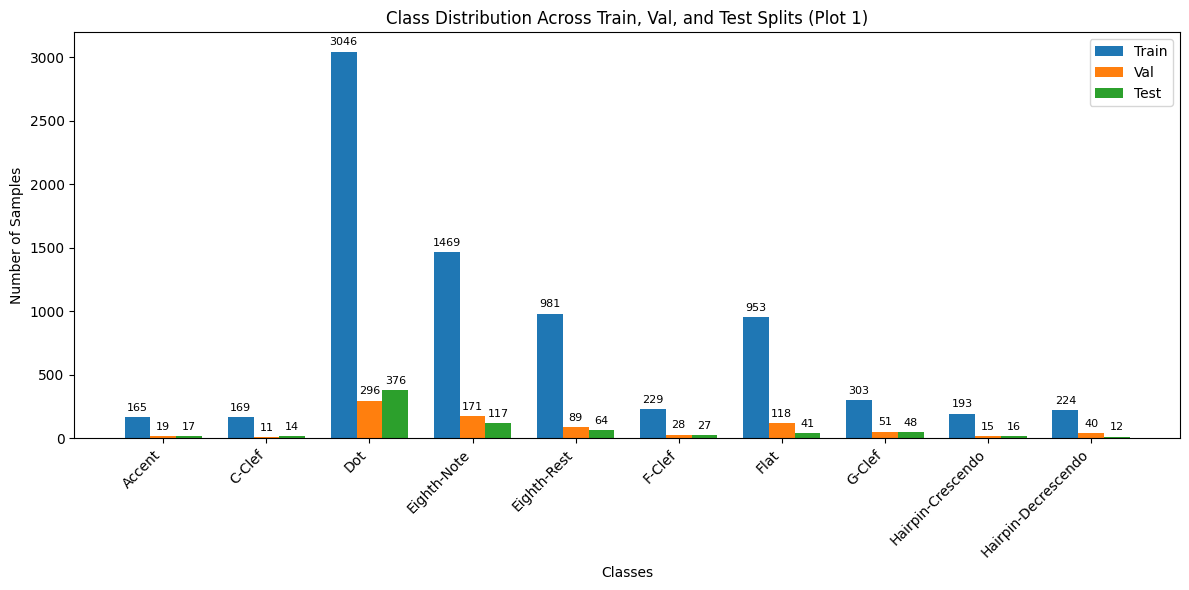

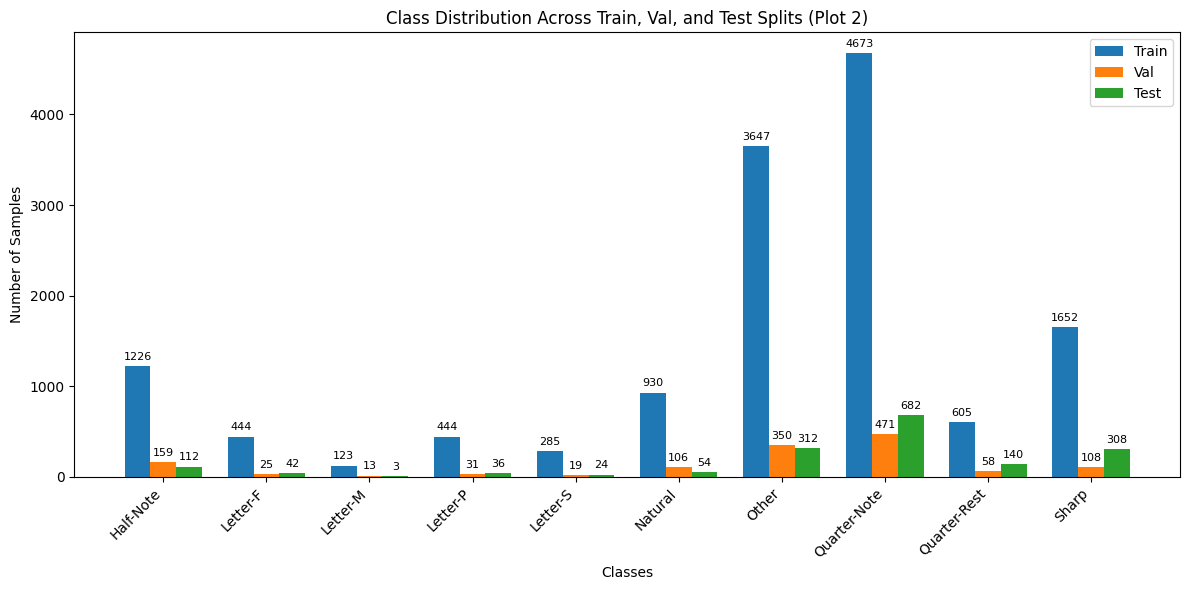

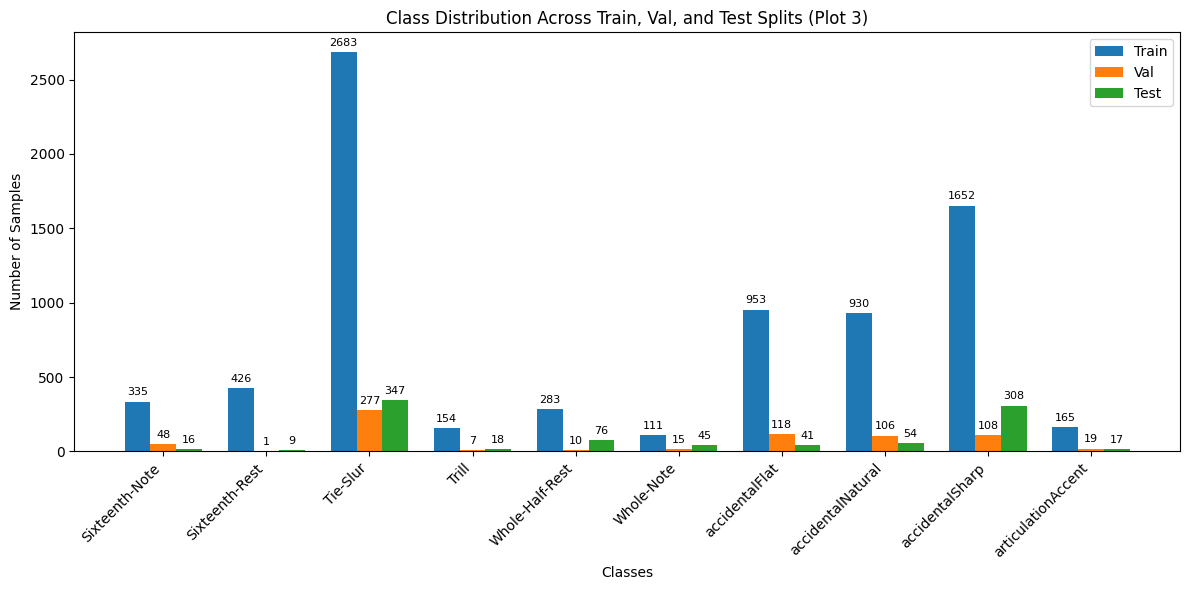

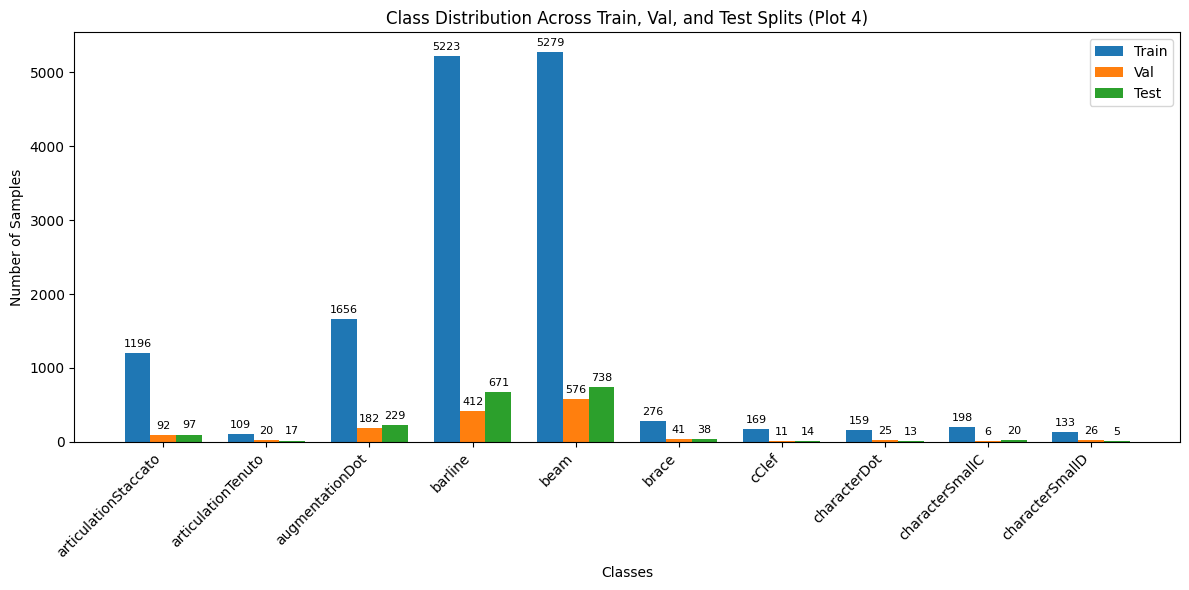

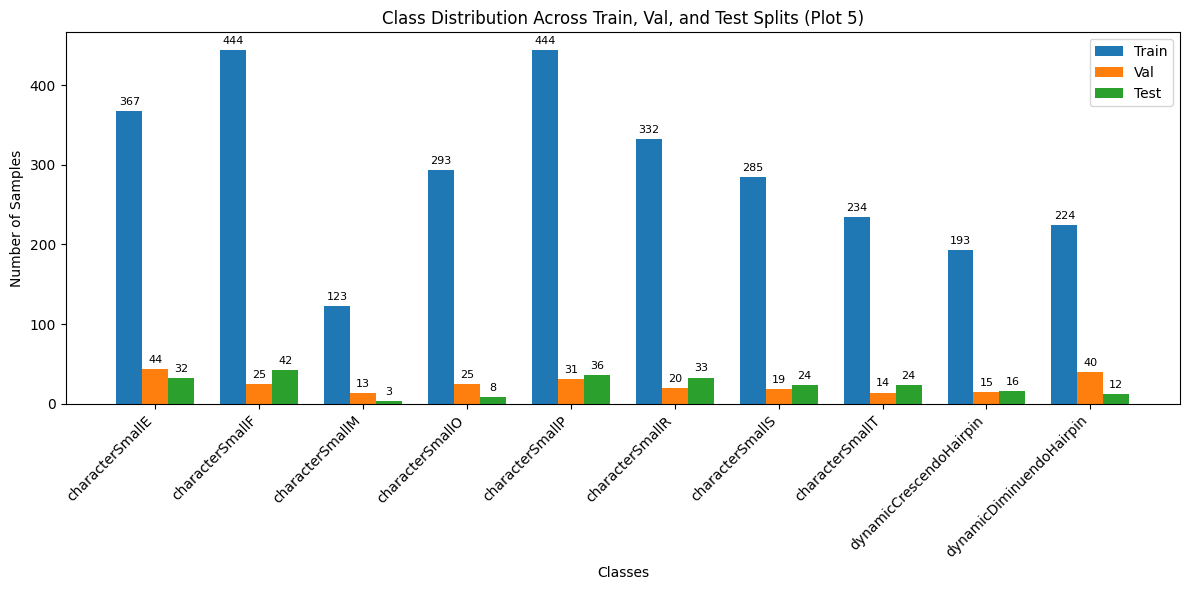

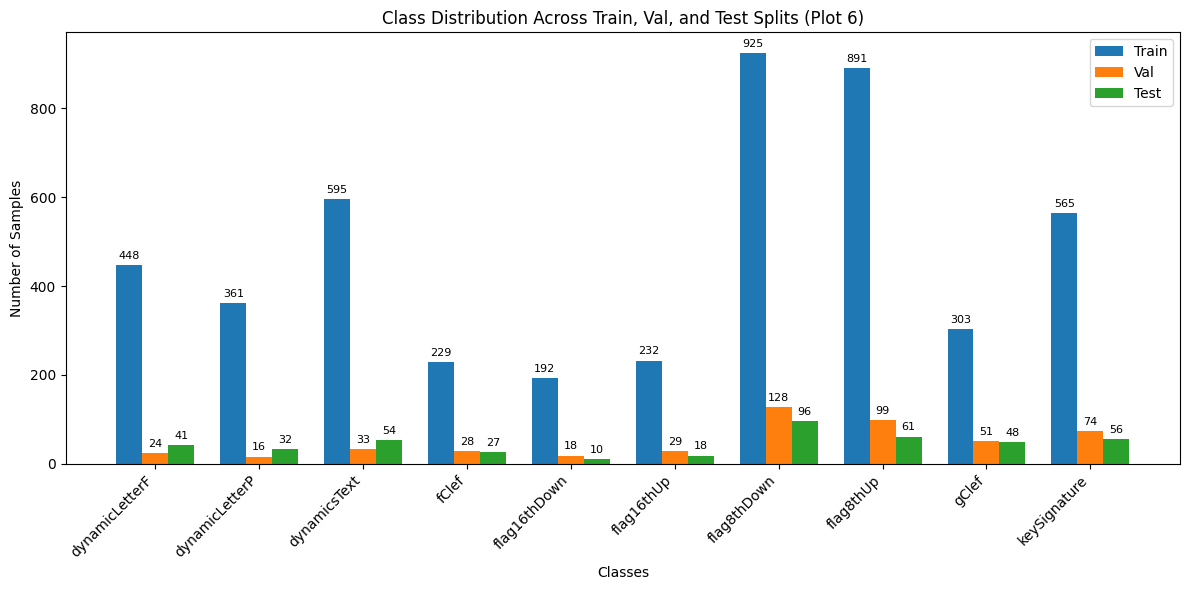

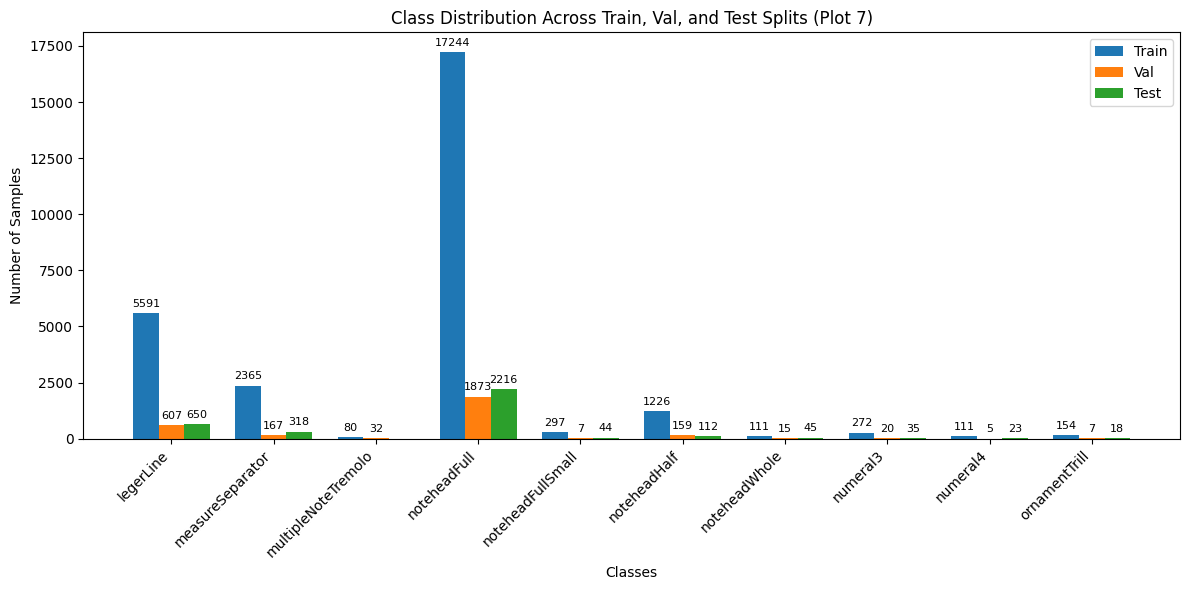

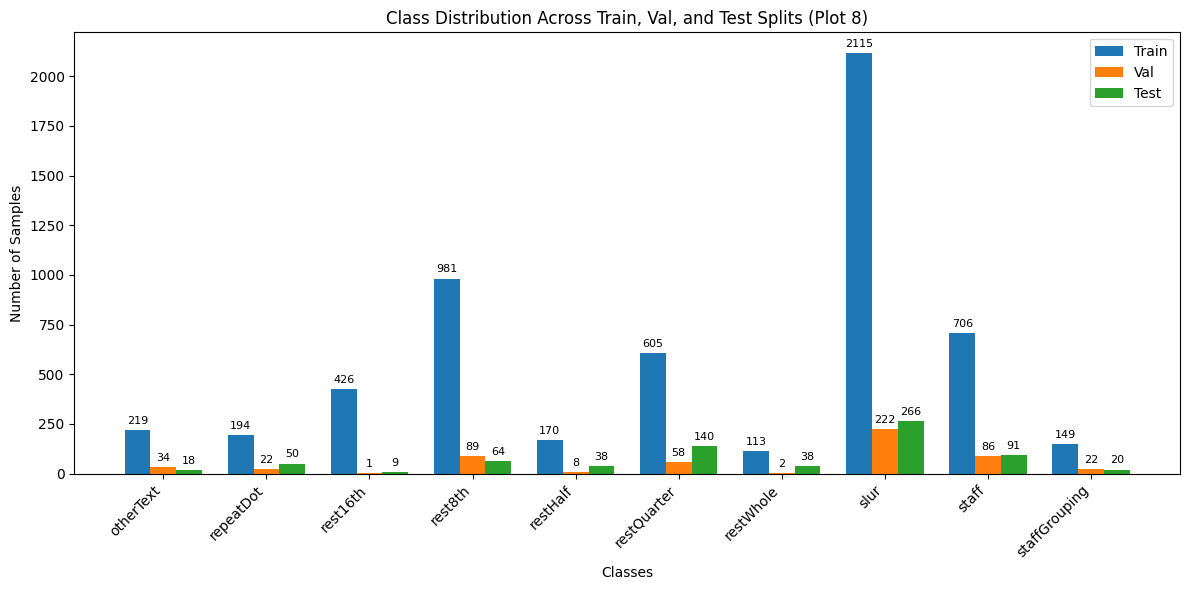

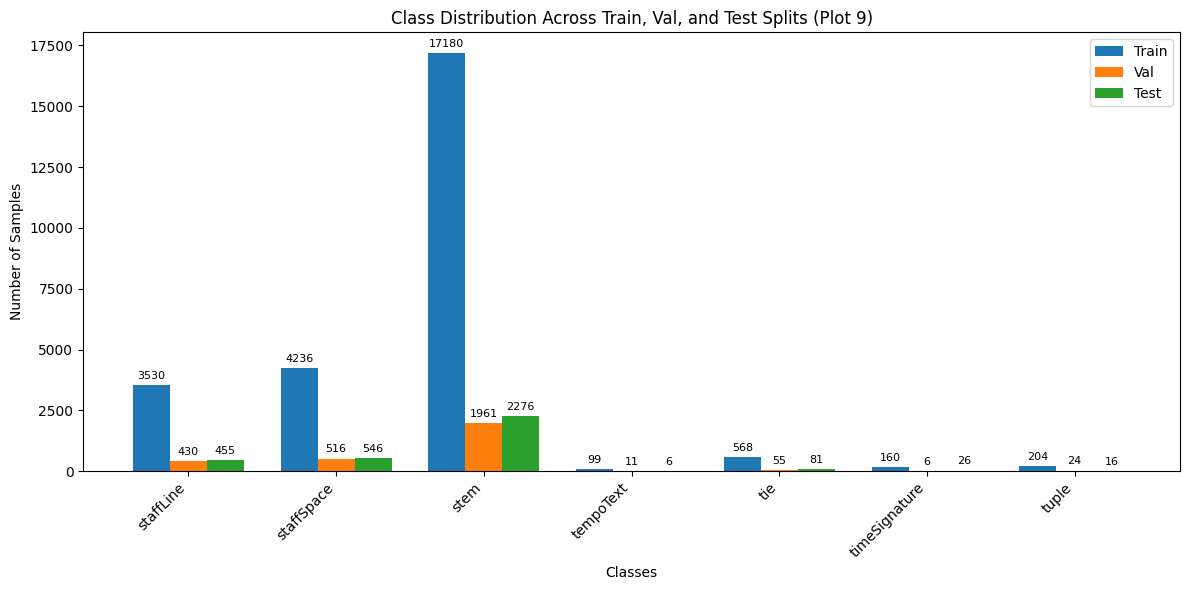

In [175]:
json_path = '/Users/costanzasiniscalchi/Documents/MS/DLCV/Sheet-Music-Parser/ModelTrainer/datasets/MUSCIMA_class_splits.json'
plot_class_distribution(json_path)